In [5]:
import os
import cv2
import torch
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers

In [6]:
import tensorflow as tf
import numpy as np

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:/Users/dsnat/Downloads/dataset/train",
    image_size=(224, 224),
    batch_size=32
)

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:/Users/dsnat/Downloads/dataset/test",
    image_size=(224, 224),
    batch_size=32
)

# Class information
num_classes = len(train_ds.class_names)

print("Classes:", train_ds.class_names)
print("Number of classes:", num_classes)


Found 7057 files belonging to 2 classes.
Found 1020 files belonging to 2 classes.
Classes: ['images', 'labels']
Number of classes: 2


In [7]:
for images, labels in train_ds.take(1):
    print(images.shape)   # (32, 224, 224, 3)
    print(labels.shape)   # (32,)


(32, 224, 224, 3)
(32,)


In [4]:
num_classes = len(train_ds.class_names)
print("Classes:", train_ds.class_names)
print("Number of classes:", num_classes)

Classes: ['images', 'labels']
Number of classes: 2


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# -----------------------------
# 4. Data augmentation
# -----------------------------
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [9]:
# 5. Model definition
# -----------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    data_augmentation,

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

C:\Users\dsnat\anaconda3\envs\ml_lab\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
EPOCHS = 2

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS
)

Epoch 1/2
221/221 ━━━━━━━━━━━━━━━━━━━━ 304s 1s/step - accuracy: 0.9857 - loss: 0.0187 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/2
221/221 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [12]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 1.0000


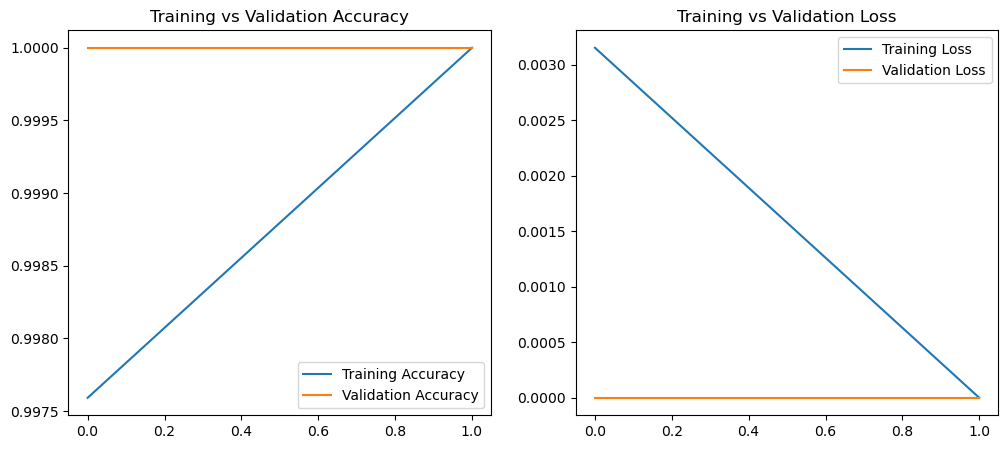

In [16]:
import matplotlib.pyplot as plt

# -----------------------------
# 10. Training graphs
# -----------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

plt.show()
